# Salaries in Science


#### Kayla Wen, Colin Chen, Paria Sokhanran, Justin Leung 

## Part I: Introduction
The decision of what to study in university is an undeniable challenge many students encounter. Whether it be the Sciences, Arts, or Business, there is an abundance of pathways that scholars could potentially pursue. For most, the goal is to finish their degree and get a well-paying job after graduation. As current university students, our group is interested in investigating the correlation between one’s academic success and their future financial status. Therefore, we aim to answer the following question: How can one’s grades be used to determine their future salary in the field of Science? To accomplish this, we will use a data set taken from Kaggle, which includes multiple files with information about individuals’ majors, grades, career prospects, and other personal information such as age. Furthermore, we will also be using an Excel file that shows the entry averages for various Science majors at UBC. 

## Part II: Preliminary Exploratory Data Analysis

In [64]:
#Run this cell first

library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)


#### Reading the Data Set

In [52]:
## reads the data of the average salary of graduates with a certain degree and major
data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/all-ages.csv") |>
    mutate(Employment_rate = 1 - Unemployment_rate) 

data

Rows: 173 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Major, Major_category
dbl (10): index, Major_code, Total, Employed, Employed_full_time_year_round,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000,0.9738529
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000,0.9713639
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000,0.9697517
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000,0.9573211
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000,0.9508116
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000,0.9682091
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.05086705,63000,39400,88000,0.9491329
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.03923042,52000,35000,75000,0.9607696
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


#### Spliting the data set into Training and Testing

In [72]:
## splits data into training and testing
data_split <- initial_split(data, prop = 0.75, strata = NULL)
data_training <- training(data_split)
data_testing <- testing(data_split)

data_training
data_testing

index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.06715942,95000,65000,128000,0.9328406
160,6202,ACTUARIAL SCIENCE,Business,9763,7846,6880,466,0.05606352,72000,53000,115000,0.9439365
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.05086705,63000,39400,88000,0.9491329
91,3701,APPLIED MATHEMATICS,Computers & Mathematics,19112,15136,12109,892,0.05565261,70000,47000,106000,0.9443474
137,5901,TRANSPORTATION SCIENCES AND TECHNOLOGIES,Industrial Arts & Consumer Services,126639,98814,83519,4902,0.04726368,67000,42500,98000,0.9527363
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.05267856,53000,36000,83000,0.9473214
155,6109,TREATMENT THERAPY PROFESSIONS,Health,252138,199174,128115,5378,0.02629160,61000,40000,80000,0.9737084
42,2402,BIOLOGICAL ENGINEERING,Engineering,32748,24270,18621,1521,0.05897406,62000,40000,91000,0.9410259
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000,0.9738529
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000,0.9573211
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.03923042,52000,35000,75000,0.9607696
11,1401,ARCHITECTURE,Engineering,294692,216770,163020,20394,0.08599113,63000,40400,93500,0.9140089
14,1902,JOURNALISM,Communications & Journalism,418104,314438,235407,20754,0.06191675,50000,35000,80000,0.9380832
15,1903,MASS MEDIA,Communications & Journalism,211213,170474,125489,15431,0.08300476,48000,32000,70000,0.9169952
16,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,186829,147433,111552,10624,0.06721626,50000,34000,75000,0.9327837
24,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,42325,33388,25780,1941,0.05494070,40000,26200,60000,0.9450593
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


#### Summarizing data sets

In [73]:
## summarizes the data sets for only relevant columns
data_training <- data_training |>
    select(Employment_rate, Median, P25th, P75th)

data_training

Employment_rate,Median,P25th,P75th
<dbl>,<dbl>,<dbl>,<dbl>
0.9328406,95000,65000,128000
0.9439365,72000,53000,115000
0.9491329,63000,39400,88000
0.9443474,70000,47000,106000
0.9527363,67000,42500,98000
0.9473214,53000,36000,83000
0.9737084,61000,40000,80000
0.9410259,62000,40000,91000
⋮,⋮,⋮,⋮


#### Plot for Employment Rate vs Median Salary

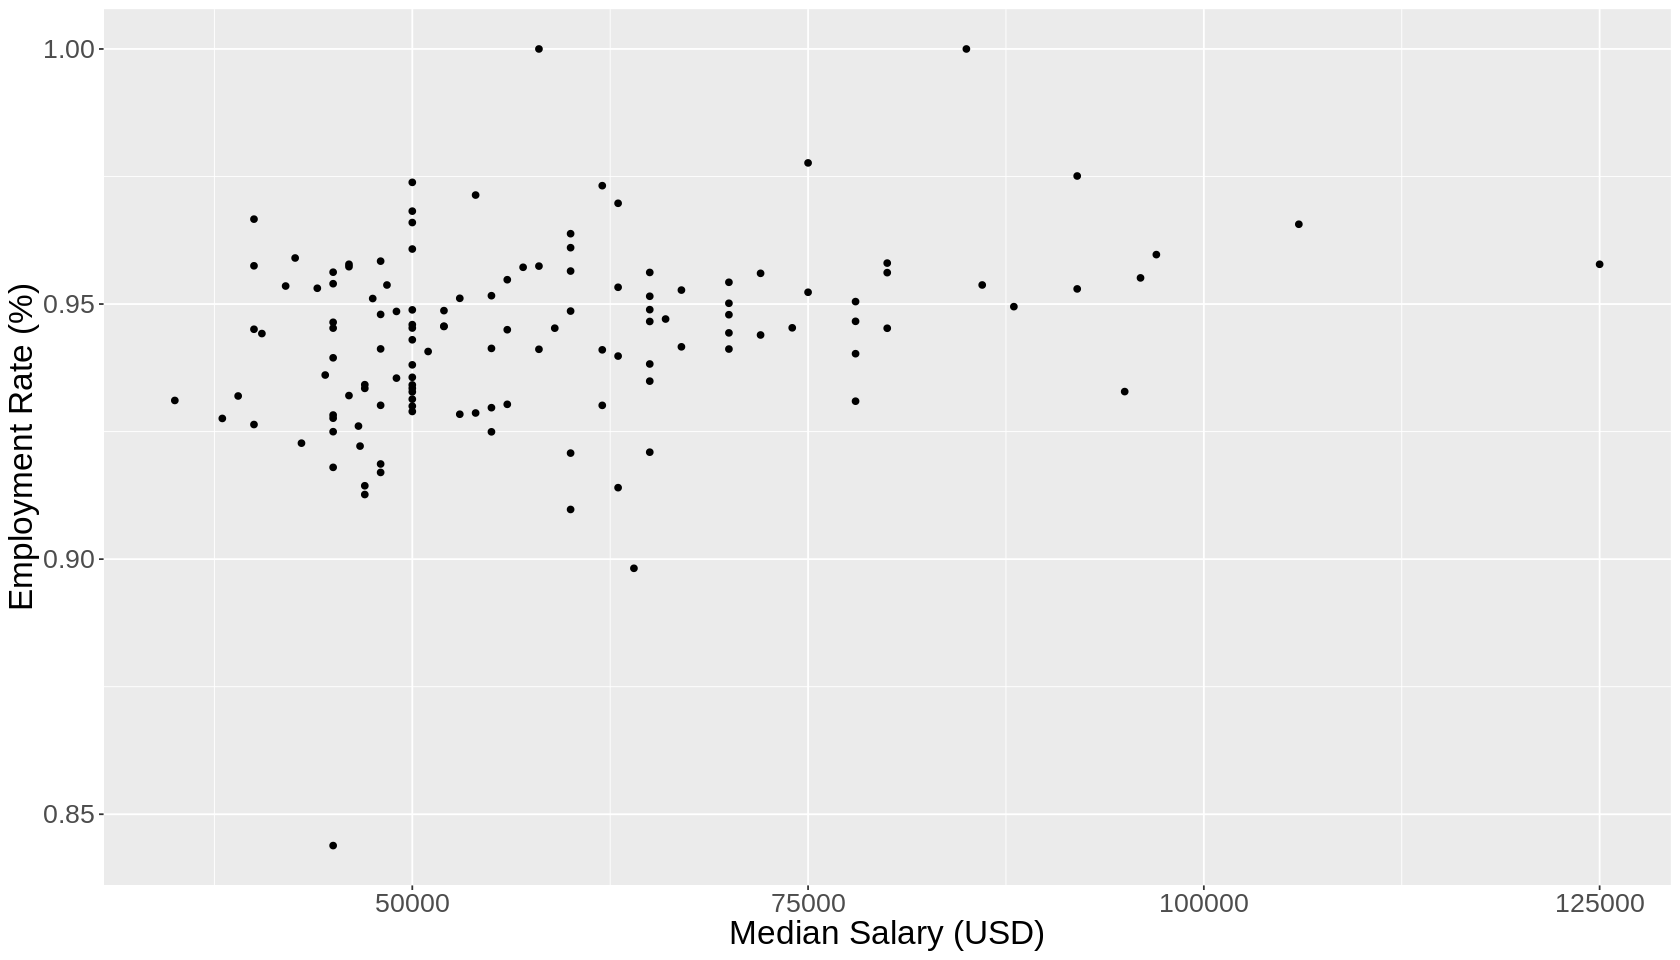

In [71]:
plotmedian <- data_training |>
    ggplot(aes(x = Median, y = Employment_rate)) +
    geom_point() +
    labs(x = "Median Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plotmedian 

#### Plot for Employment Rate vs 25th Percentile Salary

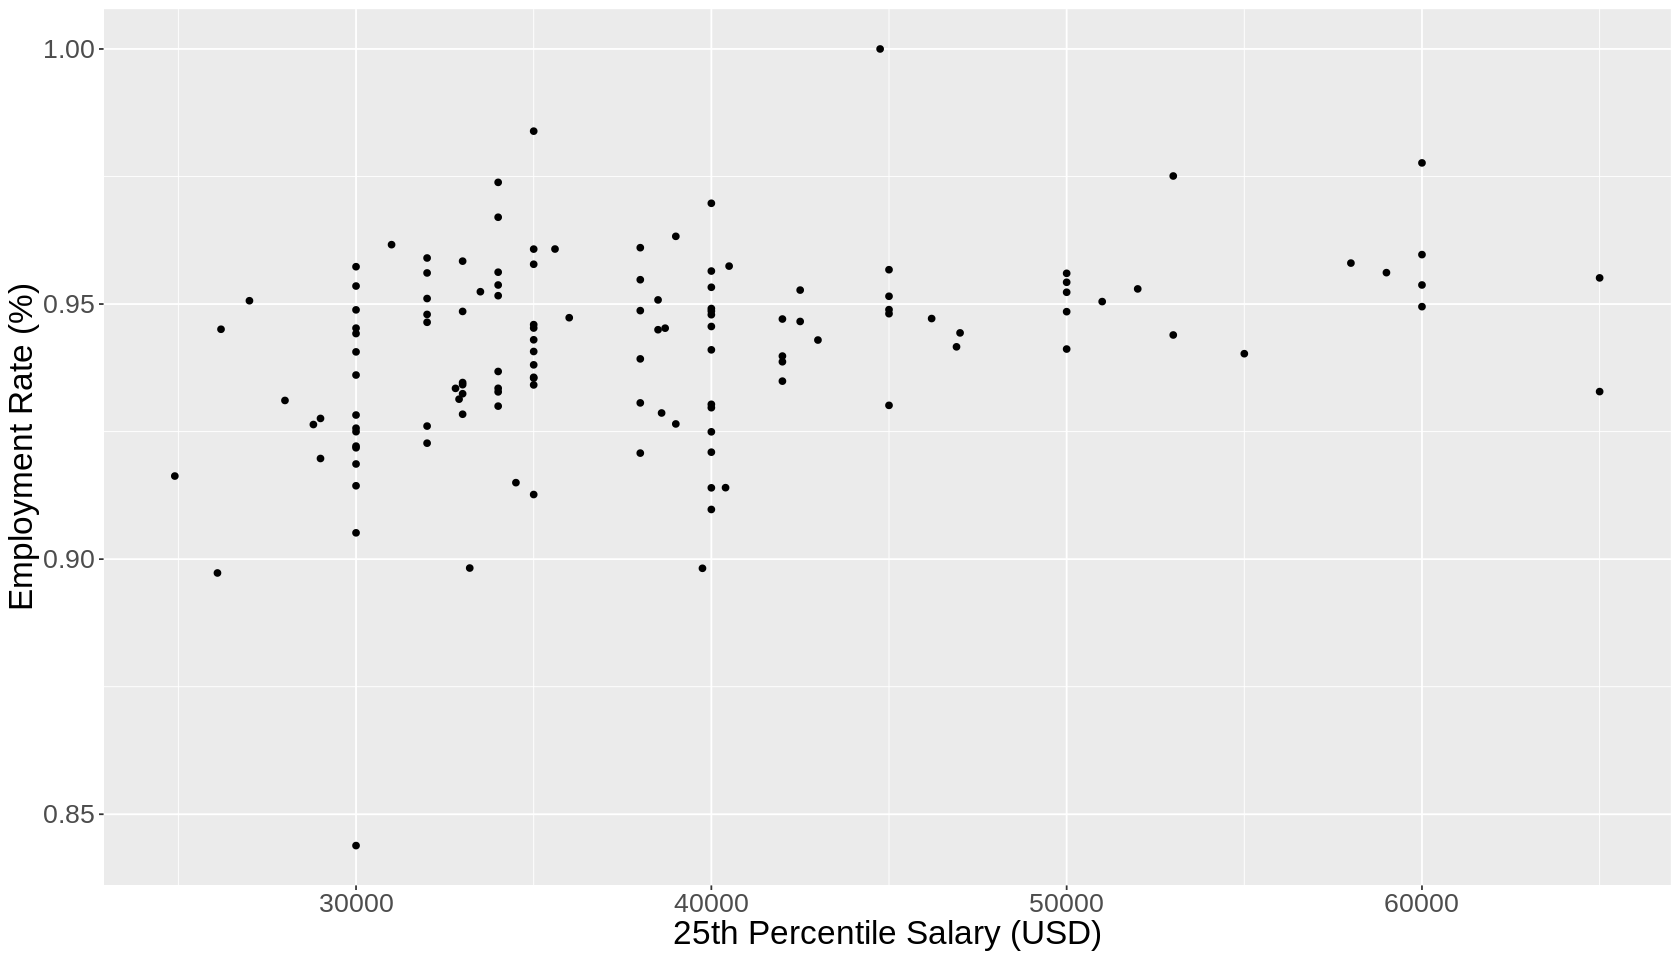

In [60]:
plot25 <- data_training |>
    ggplot(aes(x = P25th, y = Employment_rate)) +
    geom_point() +
    labs(x = "25th Percentile Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plot25

#### Plot for Employment Rate vs 75th Percentile Salary

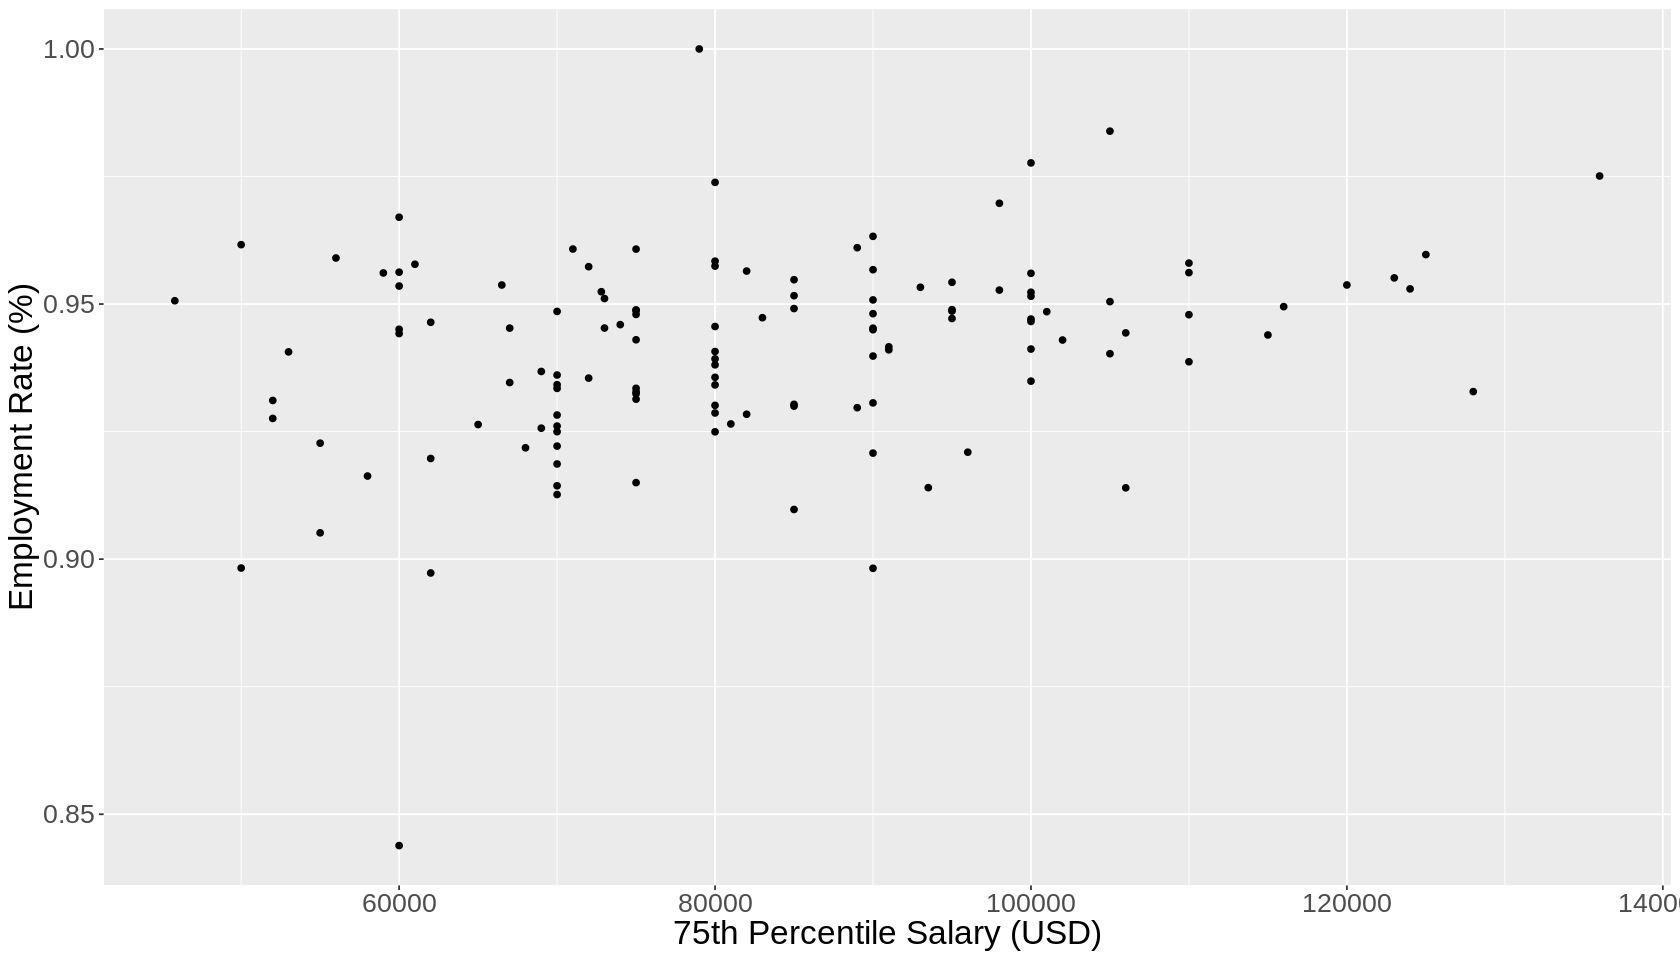

In [59]:
plot75 <- data_training |>
    ggplot(aes(x = P75th, y = Employment_rate)) +
    geom_point() +
    labs(x = "75th Percentile Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plot75 

## Part III: Methods
We will conduct our data analysis by using the techniques and functions from the worksheets and tutorial sets and expect much of our coding to be based on the content we have learned through the course so far. We will merge a data set from Kaggle with data from UBC’s second-year specializations file. For the Kaggle data set, we intend to mainly use the information from the columns “major” and “salary”, focusing our attention on majors under the Faculty of Science. We will focus on the “min grade” column of select science majors for the UBC data set. Furthermore, We will take an average of 2020, 2021, and 2022 data, representing the average grade requirement for entry into that specialization. To visualize our findings, we will be creating a scatter plot. The x-axis will be labeled “Entry Average (%)”, and the y-axis will be labeled “Median Salary (USD)”. The points will be color coded to represent each of the majors, and we will use a colorblind-friendly palette to ensure inclusivity. In addition, we have included a 25th and 75th percentile salary column in our table, and we intend to create additional plots to provide a more comprehensive perspective on the relationship between the competitiveness for a major and its post-graduation outcomes. 


## Part IV: Expected Outcomes and Significance

While all educational backgrounds have opportunities for success in their fields, we expect the Computer Science major alumni to have the highest salaries post-university. This prediction is mainly based on our personal experiences in our undergraduate journey and the availability of opportunities within this major immediately after graduation. We also expect this to be the outcome because of the many drastic discoveries in the technology field compared to other industries, such as the Life Sciences. Depending on how accurate our prediction is, this model could ultimately lead to more students pursuing Computer Science as their focus, resulting in more competition to get into this major. If this is the case, this scenario could cause some difficulties for universities in showcasing the strengths of their other programs. Consequently, a potential problem may arise: How can more interest be generated for majors in which the post-graduation salaries are not as high? 



### Citiation

College majors and their graduates. Kaggle. (n.d.). https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their?resource=download&amp;select=all-ages.csv 